# ◆ 주제(가설)

<span style="font-weight: bold; font-size: 25px; color:blue">가설 1. 동학개미운동의 주역은 MZ 세대일까?</span>
### '동학개미운동'이란? 2020년도 1분기 주식시장은 코로나19의 여파로 외국인과 기관 투자자들이 빠져나가 주가가 곤두박질 치는 등 혼란의 시기였다. 이 혼란의 시기에 꾸준히 주식을 매입하며 주가를 지키는 개인들이 있었으니, 사람들은 이러한 현상을 '동학운동' 에 빗대어 '동학개미운동' 이라 불렀다.
---

# ◆ 데이터 분석 및 결과

## ■ 데이터 수집 및 데이터 설명
### 1. 한국투자증권 데이터
### 동학개미운동(20.01.20~20.03.31) 기간 동안 한국투자증권에 신규 고객으로 등록하고 국내주식을 매매한 고객 약 27만명 중, 거래내역 횟수가 총 30회 이상인 고객 약 2.5만명(10% 수준) 랜덤추출한 데이터

### 2. KRX 데이터
### 한국거래소가 개설한 KRX 정보데이터시스템에서 제공하는 데이터 중 코스피, 코스닥에 상장된 종목의 업종과 시가총액을 추출한 데이터

## ■ 데이터 전처리

### ▩ 모듈 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

pd.set_option('display.max_columns', None)
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.5f}'.format
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

### ▩ 데이터 로드

In [2]:
han = pd.read_excel('c:\\data\\fin\\2021금융데이터 경진대회_데이터셋_한국투자증권(원본).xlsx')
han.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,A0001,20200130,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,A0001,20200313,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,A00010,20200220,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,A000100,20200211,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N


### ▩ 데이터 정보 확인

In [3]:
han.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845940 entries, 0 to 845939
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   고객구분코드     845940 non-null  object
 1   주문일자       845940 non-null  int64 
 2   고객성별구분코드   845940 non-null  int64 
 3   동일나이군구분코드  845940 non-null  int64 
 4   주소(시도)     845940 non-null  object
 5   주문시간대      845940 non-null  int64 
 6   상품번호       845940 non-null  object
 7   상품명        845940 non-null  object
 8   거래소구분코드    845940 non-null  int64 
 9   매도매수구분코드   845940 non-null  int64 
 10  주문구분코드     845940 non-null  int64 
 11  실주문단가      845940 non-null  int64 
 12  주문수량       845940 non-null  int64 
 13  총체결수량      845940 non-null  int64 
 14  총체결금액      845940 non-null  int64 
 15  전일종가       845940 non-null  int64 
 16  당일시가       845940 non-null  int64 
 17  일중고가       845940 non-null  int64 
 18  일중저가       845940 non-null  int64 
 19  당일종가       845940 non-null  int64 
 20  거래수량

In [4]:
han.describe()

,주문일자,고객성별구분코드,동일나이군구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
count,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000,845940.00000
mean,20200293.58838,1.39805,32.56805,1.90209,2.53770,1.65771,1.25635,32827.89095,142.04399,138.07741,1093017.73309,31684.80669,32153.55928,33949.57668,30607.72038,32225.32488,15625385.89195,276909625170.33759
std,47.59143,0.48950,9.55029,0.85412,0.49858,0.47448,0.97964,59278.94424,528.48657,513.03926,3171094.45434,58132.40605,58496.78688,60646.37939,56393.74030,58418.37751,37128785.99145,536614921295.61780
min,20200120.00000,1.00000,20.00000,1.00000,2.00000,1.00000,1.00000,33.00000,1.00000,1.00000,59.00000,65.00000,44.00000,44.00000,35.00000,44.00000,26.00000,58195.00000
25%,20200302.00000,1.00000,30.00000,1.00000,2.00000,1.00000,1.00000,4245.00000,3.00000,2.00000,46800.00000,3960.00000,4060.00000,4450.00000,3800.00000,4095.00000,1180660.00000,12200858390.00000
50%,20200317.00000,1.00000,30.00000,2.00000,3.00000,2.00000,1.00000,11050.00000,10.00000,10.00000,183600.00000,10150.00000,10600.00000,11600.00000,9900.00000,10750.00000,5763552.00000,66142614205.00000
75%,20200326.00000,2.00000,40.00000,3.00000,3.00000,2.00000,1.00000,44650.00000,70.00000,67.00000,789000.00000,44050.00000,43850.00000,46500.00000,42400.00000,44000.00000,19626058.00000,232277000000.00000
max,20200331.00000,2.00000,50.00000,4.00000,3.00000,2.00000,5.00000,1753000.00000,10389.00000,9999.00000,52657500.00000,1410000.00000,1419000.00000,1426000.00000,1394000.00000,1410000.00000,842628691.00000,2844020000000.00000


In [5]:
han.isnull().sum()

고객구분코드       0
주문일자         0
고객성별구분코드     0
동일나이군구분코드    0
주소(시도)       0
주문시간대        0
상품번호         0
상품명          0
거래소구분코드      0
매도매수구분코드     0
주문구분코드       0
실주문단가        0
주문수량         0
총체결수량        0
총체결금액        0
전일종가         0
당일시가         0
일중고가         0
일중저가         0
당일종가         0
거래수량         0
거래대금         0
상한가여부        0
하한가여부        0
dtype: int64

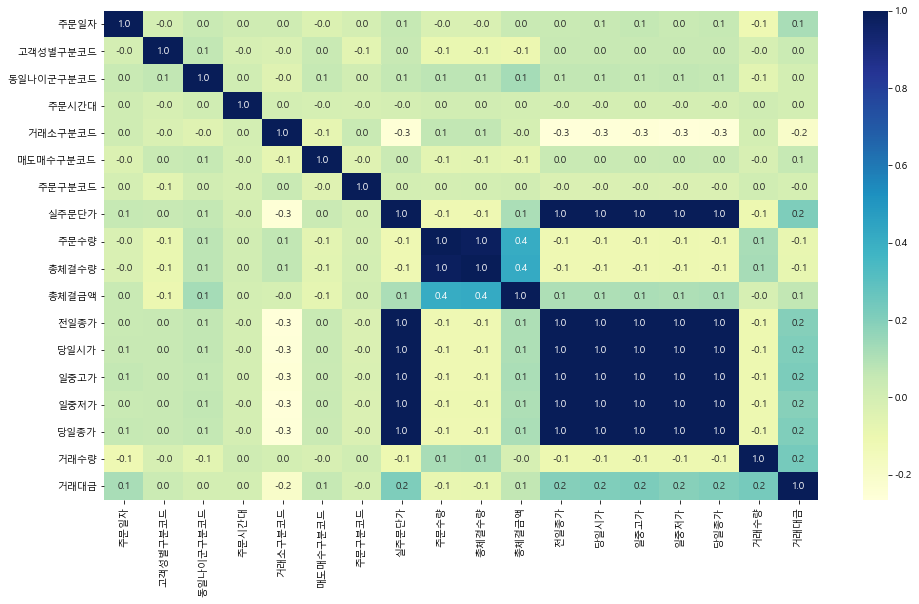

In [6]:
plt.figure(figsize=(16,9))
sns.heatmap(han.corr(), cmap='YlGnBu', annot=True, fmt='0.1f')
plt.show()

### ▩ 데이터 정보 확인 결과:
- 1. 데이터에 결측치는 없다.
- 2. 상관관계가 있는 컬럼들이 존재한다.

## ■ 기초 통계량 분석
### 나이군별 기초 통계량을 분석하여 각 나이군별 특징을 알아본다.

------------- 전체 거래 중 나이군별 비율 ---------------
30   0.39092
40   0.24847
20   0.23763
50   0.12298
Name: 동일나이군구분코드, dtype: float64
------------------------------------------------------


Text(0.5, 1.0, '나이군별 거래수')

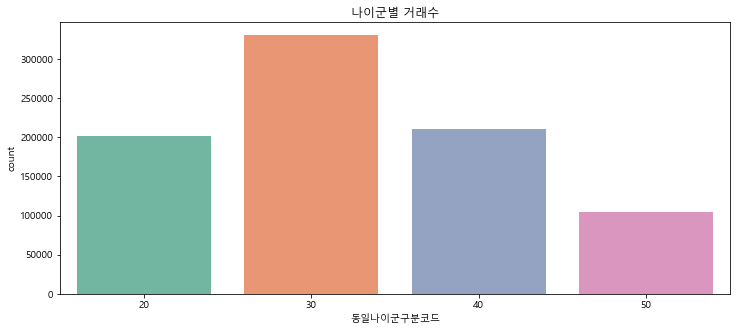

In [10]:
print('------------- 전체 거래 중 나이군별 비율 ---------------')
print(han['동일나이군구분코드'].value_counts() / han.shape[0])
print('------------------------------------------------------')

plt.figure(figsize=(12, 5))
sns.countplot(han['동일나이군구분코드'], palette='Set2')
plt.title('나이군별 거래수')

In [16]:
grouped_sum = han.groupby('동일나이군구분코드').sum()
grouped_sum

,주문일자,고객성별구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
동일나이군구분코드,,,,,,,,,,,,,,,,,
20,4060642033498,269053,382105,515532,325214,247487,5486249750,19979613,19531417,110896781229,5242832407,5343511798,5691140948,5075097247,5382851889,3866126325820,53510134065678224
30,6680176594743,467309,624834,843653,547193,423837,10681273617,43388094,42122128,336150710942,10253291765,10425714669,11048043974,9917404254,10475675410,5206734216162,93396442834166480
40,4245839638967,294604,400608,526415,354629,255375,7726204338,30680689,29851634,279829509695,7526615366,7616293398,7989890189,7259548425,7601916609,2852733541776,60060063105956968
50,2101578090943,151703,201507,261143,175284,136101,3876698362,26112296,25300021,197750419260,3780705834,3814462072,3990229785,3640245054,3800247418,1292544857681,27282288310802544


In [27]:
grouped_mean = han.groupby('동일나이군구분코드').mean()
grouped_mean

,주문일자,고객성별구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금
동일나이군구분코드,,,,,,,,,,,,,,,,,
20,20200289.69151,1.33845,1.90084,2.56459,1.61783,1.23116,27292.19502,99.39166,97.16204,551673.13154,26081.27792,26582.12307,28311.45786,25246.85352,26777.82642,19232641.32157,266194409810.40710
30,20200293.90875,1.41310,1.88945,2.55114,1.65467,1.28165,32299.27582,131.20196,127.37378,1016491.56461,31005.09459,31526.48699,33408.35863,29989.39892,31677.56408,15744727.69986,282423012105.23981
40,20200296.11235,1.40163,1.90596,2.50451,1.68721,1.21499,36758.71647,145.96854,142.02417,1331335.95177,35809.13837,36235.79669,38013.24625,34538.52248,36167.39669,13572359.57398,285745850628.04535
50,20200295.00027,1.45816,1.93688,2.51010,1.68482,1.30820,37262.68887,250.99047,243.18292,1900770.10352,36340.01205,36664.47583,38353.94893,34989.90796,36527.84507,12423895.89935,262236399653.99371


------------- 총 체결금액 평균 중 나이군별 비율 ---------------
동일나이군구분코드
20   0.11493
30   0.21176
40   0.27735
50   0.39597
Name: 총체결금액, dtype: float64
------------------------------------------------------------


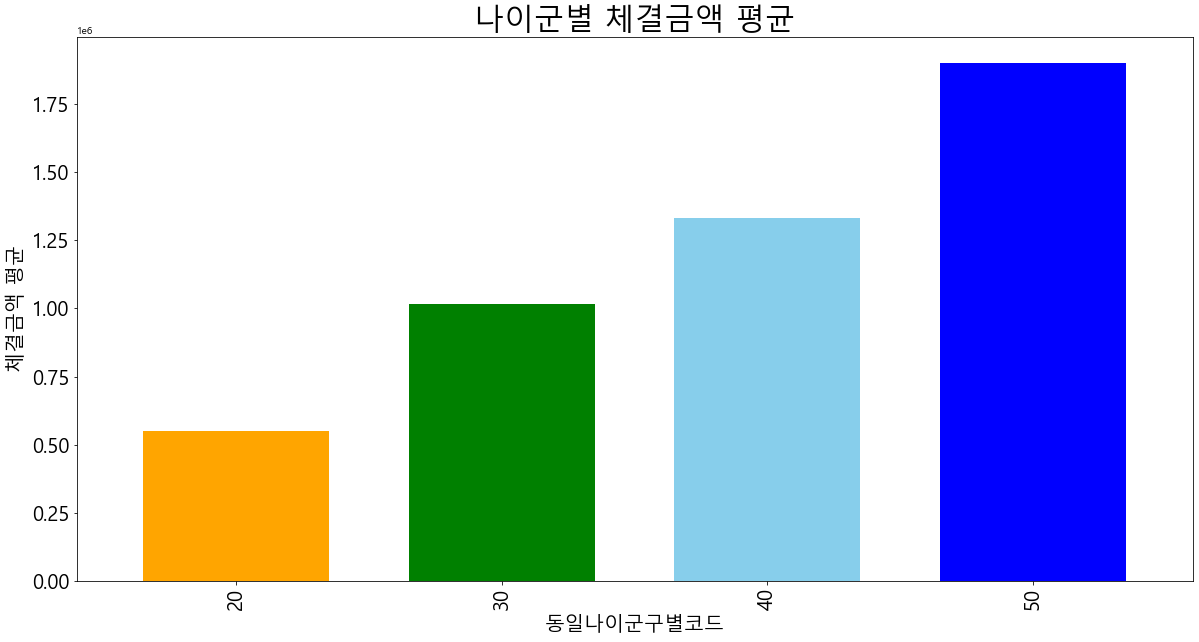

In [29]:
print('------------- 총 체결금액 평균 중 나이군별 비율 ---------------')
print(grouped_mean['총체결금액'] / grouped_mean['총체결금액'].sum())
print('------------------------------------------------------------')

grouped_mean['총체결금액'].plot(kind='bar', figsize=(20,10), width=0.7, fontsize=20,
                              color=['orange', 'green', 'skyblue', 'blue'])
plt.title('나이군별 체결금액 평균', size=30)
plt.ylabel('체결금액 평균', size=20)
plt.xlabel('동일나이군구별코드', size=20)
plt.show()

------------- 전체 체결금액 중 나이군별 비율 ---------------
동일나이군구분코드
20   0.11994
30   0.36355
40   0.30264
50   0.21387
Name: 총체결금액, dtype: float64
---------------------------------------------------------


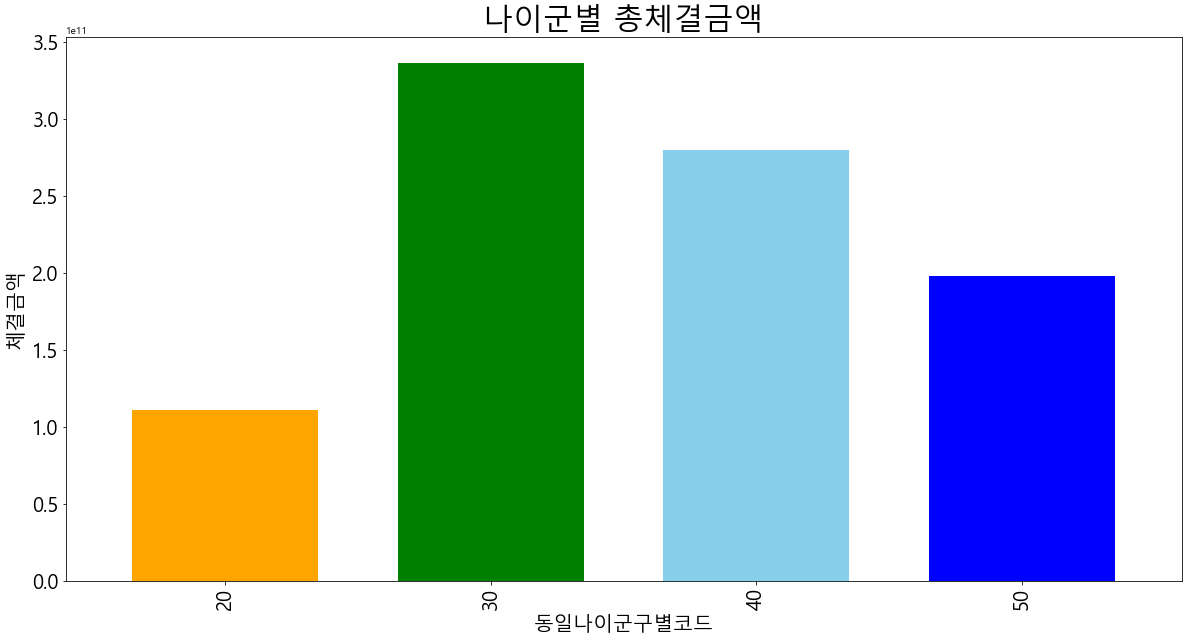

In [31]:
print('------------- 전체 체결금액 중 나이군별 비율 ---------------')
print(grouped_sum['총체결금액'] / grouped_sum['총체결금액'].sum())
print('---------------------------------------------------------')

grouped_sum['총체결금액'].plot(kind='bar', figsize=(20,10), width=0.7, fontsize=20,
                              color=['orange', 'green', 'skyblue', 'blue'])
plt.title('나이군별 총체결금액', size=30)
plt.ylabel('체결금액', size=20)
plt.xlabel('동일나이군구별코드', size=20)
plt.show()

## ■ 기초 통계량 분석 결과:
- 1. 전체 거래수는 30대 > 40대 = 20대 > 50대 순으로 많다.
- 2. 하지만, 체결금액 평균은 50대 > 40대 > 30대 > 20대 순으로 많다.
- 3. 최종적으로 총체결금액은 30대 > 40대 > 50대 > 20대 순으로 많다.
- 4. MZ 세대(20, 30대) 는 상대적으로 거래수는 많지만, 실제 체결금액은 적고, 다른세대는 거래수는 적지만, 건당 체결금액은 크다.

---
### 가설 1(동학개미운동의 주역은 MZ 세대일까?) 의 검증:
<span style="font-weight: bold; font-size: 20px; color:blue"> 동학개미운동 기간 동안 신규 투자는 30대에서 주로 이루어졌다. 30대는 거래수와 총체결금액이 모든 세대중에서 가장 많았다. 20대는 투자금액은 적었지만 40대와 거래수가 비슷하여, 20대가 40대에 비해 상대적으로 고정수입이 적음에도 주식 투자 활동은 활발히 하는 것을 알 수 있었다.</span>

<span style="font-weight: bold; font-size: 20px; color:blue">따라서, 동학개미운동에서 기존 세대보다 MZ 세대(20대, 30대)가 더 주역이었다고 할 수 있다.</span>

---

<span style="font-weight: bold; font-size: 25px; color:blue">가설 2. MZ 세대의 주식투자 특징은 무엇일까?</span>
### 1. 머신러닝 분류 모델을 이용하여 MZ 세대와 다른 세대의 구별되는 특징을 도출해본다.
### 2. KRX 데이터를 활용하여 MZ 세대와 다른 세대의 구별되는 특징을 도출해본다.

## ■ 1. 머신러닝 분류 모델을 활용하여 기성 세대와 구별되는 MZ 세대의 특징 도출하기

### ▩ 데이터 전처리

### 1. MZ 세대와 기성 세대를 구별하기 위해 '동일나이군구분코드' 에서 20, 30을 1로 40, 50을 0으로 치환한다.

In [33]:
han_e = han.copy()

In [34]:
han_e['동일나이군구분코드'].unique()

array([30, 20, 40, 50], dtype=int64)

In [35]:
han_e['동일나이군구분코드'] = han_e['동일나이군구분코드'].map(lambda x:1 if x in [20, 30] else 0)
han_e.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,A0001,20200128,1,1,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,A0001,20200130,1,1,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,A0001,20200313,1,1,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,A00010,20200220,1,1,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,A000100,20200211,2,0,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N


### 2. 머신러닝 모델에 fit 시키기 위해 명목형인 변수를 수치형으로 변환시킨다.

In [64]:
han_e[han_e.columns[han_e.dtypes.map(lambda x:x=='object')]].describe().transpose()

,count,unique,top,freq
고객구분코드,845940,24989,A00015340,7604
주소(시도),845940,16,경기,249914
상품번호,845940,1971,00000A005930,60396
상품명,845940,1971,삼성전자보통주,60396
상한가여부,845940,2,N,796639
하한가여부,845940,2,N,844398


In [65]:
han_e2 = han_e.copy()
han_e2.drop(['고객구분코드', '상품번호', '상품명'], axis=1, inplace=True)
han_e2.head()

,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부
0,20200128,1,1,경기,1,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N
1,20200130,1,1,경기,3,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N
2,20200313,1,1,경기,1,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N
3,20200220,1,1,경남,3,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N
4,20200211,2,0,서울,1,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N


In [66]:
han_e2_dum = pd.get_dummies(han_e2)
han_e2_dum.head()

,주문일자,고객성별구분코드,동일나이군구분코드,주문시간대,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,주소(시도)_강원,주소(시도)_경기,주소(시도)_경남,주소(시도)_경북,주소(시도)_광주,주소(시도)_대구,주소(시도)_대전,주소(시도)_부산,주소(시도)_서울,주소(시도)_울산,주소(시도)_인천,주소(시도)_전남,주소(시도)_전북,주소(시도)_제주,주소(시도)_충남,주소(시도)_충북,상한가여부_N,상한가여부_Y,하한가여부_N,하한가여부_Y
0,20200128,1,1,1,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,20200130,1,1,3,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,20200313,1,1,1,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,20200220,1,1,3,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,20200211,2,0,1,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


### 3. 정답 컬럼을 분리하고, 훈련 데이터와 테스트 데이터로 나눈다.

In [67]:
x = han_e2_dum.loc[:, han_e2_dum.columns != '동일나이군구분코드']
y = han_e2_dum['동일나이군구분코드']

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### ▩ 머신러닝 모델을 생성한다.

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

### ▩ 모델을 훈련시킨다.

In [72]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### ▩ 모델을 평가한다.

In [73]:
y_hat = knn.predict(x_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_hat)
print(knn_matrix)

knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

[[30138 32407]
 [26038 80605]]
              precision    recall  f1-score   support

           0       0.54      0.48      0.51     62545
           1       0.71      0.76      0.73    106643

    accuracy                           0.65    169188
   macro avg       0.62      0.62      0.62    169188
weighted avg       0.65      0.65      0.65    169188



### ▩ 모델을 개선한다.

In [70]:
# 개선된 모델 생성
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# 개선된 모델 훈련
dt.fit(x_train, y_train)

# 개선된 모델 평가
pred = dt.predict(x_test)

from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, pred)
print(knn_matrix)

from sklearn import metrics
model_report = metrics.classification_report(y_test, pred)
print(model_report)

[[36094 26451]
 [28575 78068]]
              precision    recall  f1-score   support

           0       0.56      0.58      0.57     62545
           1       0.75      0.73      0.74    106643

    accuracy                           0.67    169188
   macro avg       0.65      0.65      0.65    169188
weighted avg       0.68      0.67      0.68    169188



### ▩ 모델을 활용한다.
### 머신러닝 분류 모델이 MZ 세대와 기성 세대를 분류할 때 어떤 컬럼을 활용했는지 중요도를 평가해보고, 분류 모델을 시각화해 본다.

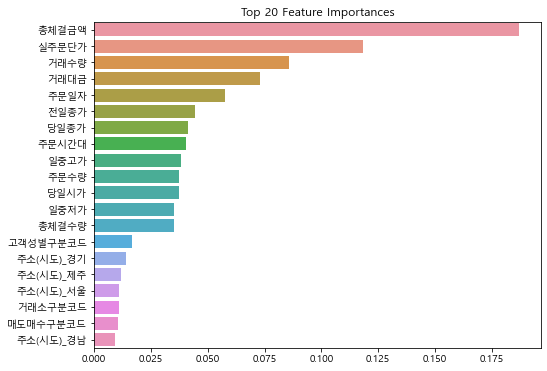

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = dt.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

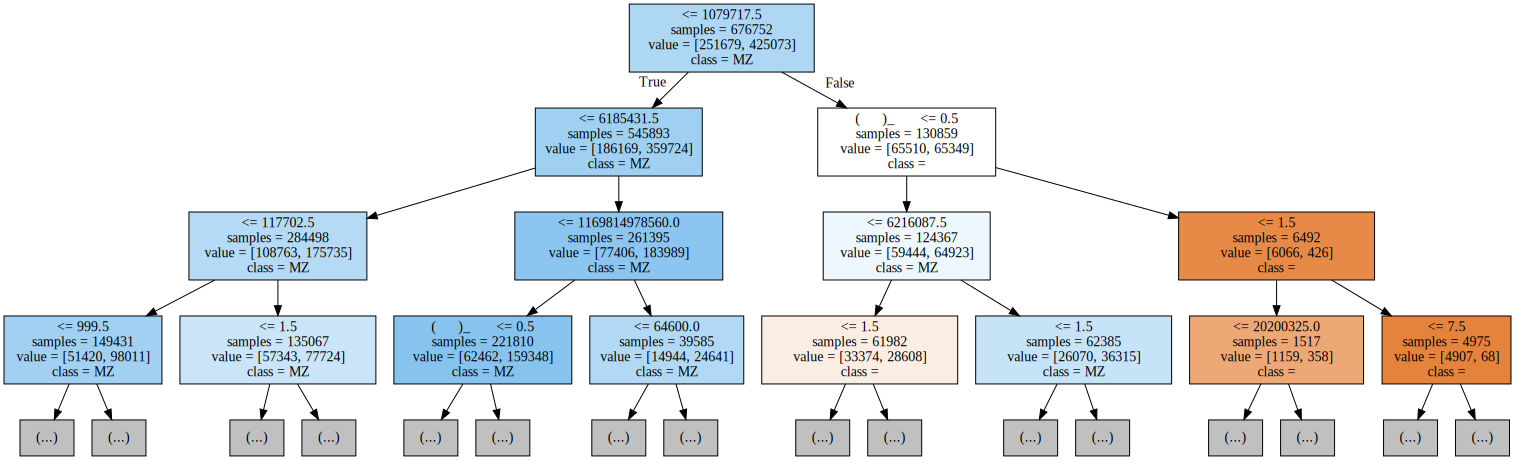

In [86]:
import graphviz
from sklearn.tree import export_graphviz
import os
os.environ["PATH"]+=os.pathsep+'C:\\Program Files\\Graphviz\\bin'

export_graphviz(dt, out_file='tree_han.dot',
                class_names=['다른세대','MZ세대'],
                feature_names=x.columns,
                max_depth=3,
                precision=3,
                impurity=False, # gini 미출력
                filled=True) # filled: node의 색깔을 다르게

with open('tree_han.dot', 'rt', encoding='UTF8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

---

<span style="font-weight: bold; font-size: 20px; color:blue">머신러닝 분류 모델은 MZ 세대와 다른 세대를 분류할 때, '총체결금액', '실주문단가', '거래수량', '거래대금' 순으로 중요하게 활용하였다.</span>
<span style="font-weight: bold; font-size: 20px; color:blue">특히, '총체결금액' 이 MZ 세대와 다른 세대를 분류할 때 매우 중요하다고 여겼는데, 이는 앞전의 기초통계량 분석을 통해 20, 30대가 40, 50대에 비해 총체결금액이 적다고 분석한 결과와 일치한다.</span>

---

## ■ 2. KRX 데이터를 활용하여 MZ 세대가 기성 세대와 구별되는 특징 도출하기
### 주식 종목별 업종이 KRX 데이터에 있으므로, KRX 데이터를 한국투자증권 데이터와 merge 하여 세대별로 어떤 업종을 선호하는지 분석하고자 한다.

### ▩ KRX 데이터 로드

In [87]:
kospi = pd.read_csv('c:\\data\\fin\\kospi.csv', encoding='euckr')
kospi.head()

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액
0,095570,AJ네트웍스,KOSPI,서비스업,4920,-180,-3.53000,230365691400
1,006840,AK홀딩스,KOSPI,기타금융,30400,200,0.66000,402725854400
2,027410,BGF,KOSPI,기타금융,5270,10,0.19000,504427488570
3,282330,BGF리테일,KOSPI,유통업,169000,0,0.00000,2920980114000
4,138930,BNK금융지주,KOSPI,기타금융,6760,-40,-0.59000,2203322262960


In [88]:
kosdaq = pd.read_csv('c:\\data\\fin\\kosdaq.csv', encoding='euckr')
kosdaq.head()

,종목코드,종목명,시장구분,업종명,종가,대비,등락률,시가총액
0,060310,3S,KOSDAQ,기계·장비,2950,95,3.33000,132077821850
1,054620,APS홀딩스,KOSDAQ,금융,13800,450,3.37000,281440249800
2,265520,AP시스템,KOSDAQ,반도체,33300,1700,5.38000,482191559100
3,211270,AP위성,KOSDAQ,통신장비,7380,100,1.37000,110809253520
4,035760,CJ ENM,KOSDAQ,방송서비스,153500,700,0.46000,3366125139000


### ▩ 데이터 전처리
### kospi, kosdaq 데이터프레임에서 각각 필요한 컬럼만 선택 후 하나의 데이터프레임으로 통합한다.

In [89]:
kospi2 = kospi[['종목코드', '업종명', '시가총액']]
print(kospi2.shape)
kospi2.head()

(916, 3)


,종목코드,업종명,시가총액
0,095570,서비스업,230365691400
1,006840,기타금융,402725854400
2,027410,기타금융,504427488570
3,282330,유통업,2920980114000
4,138930,기타금융,2203322262960


In [90]:
kosdaq2 = kosdaq[['종목코드', '업종명', '시가총액']]
print(kosdaq2.shape)
kosdaq2.head()

(1398, 3)


,종목코드,업종명,시가총액
0,060310,기계·장비,132077821850
1,054620,금융,281440249800
2,265520,반도체,482191559100
3,211270,통신장비,110809253520
4,035760,방송서비스,3366125139000


In [91]:
kos = pd.concat([kospi2, kosdaq2], axis=0)
print(kos.shape)
kos.head()

(2314, 3)


,종목코드,업종명,시가총액
0,095570,서비스업,230365691400
1,006840,기타금융,402725854400
2,027410,기타금융,504427488570
3,282330,유통업,2920980114000
4,138930,기타금융,2203322262960


In [94]:
# kos 와 merge 하기 위해 han 의 종목코드 컬럼을 kos 와 동일하게 수정한다.
han['종목코드'] = han['상품번호'].str[-6:]
han.head()

,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부,종목코드
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N,091970
1,A0001,20200130,1,30,경기,3,00000A045060,오공,3,2,1,7710,20,20,154200,7690,8150,8380,7360,7920,15686931,125404000000,N,N,045060
2,A0001,20200313,1,30,경기,1,00000A253840,수젠텍,3,2,1,11800,10,10,118000,13600,12200,12250,10150,10750,3731106,40782765600,N,N,253840
3,A00010,20200220,1,20,경남,3,00000A009190,대양금속보통주,2,2,1,3505,14,14,49070,3615,3615,3675,3475,3505,635410,2250893355,N,N,009190
4,A000100,20200211,2,40,서울,1,00000A001740,SK네트웍스보통주,2,1,1,4875,3,3,14625,4780,4800,4885,4800,4850,1263089,6112026870,N,N,001740


In [95]:
han_merge = pd.merge(han, kos, how='inner', on='종목코드')
print(han_merge.shape)
han_merge.head()

(837987, 27)


,고객구분코드,주문일자,고객성별구분코드,동일나이군구분코드,주소(시도),주문시간대,상품번호,상품명,거래소구분코드,매도매수구분코드,주문구분코드,실주문단가,주문수량,총체결수량,총체결금액,전일종가,당일시가,일중고가,일중저가,당일종가,거래수량,거래대금,상한가여부,하한가여부,종목코드,업종명,시가총액
0,A0001,20200128,1,30,경기,1,00000A091970,나노캠텍,3,2,1,3795,20,20,75900,3215,3710,4125,3660,4095,17266597,67323312855,N,N,091970,화학,60535578795
1,A00010027,20200326,1,40,경기,2,00000A091970,나노캠텍,3,1,1,1630,1396,1396,2275480,1485,1580,1695,1520,1615,2471054,4018881455,N,N,091970,화학,60535578795
2,A00010338,20200128,1,40,경남,1,00000A091970,나노캠텍,3,2,1,3800,440,440,1672000,3215,3710,4125,3660,4095,17266597,67323312855,N,N,091970,화학,60535578795
3,A00011111,20200325,1,40,대전,2,00000A091970,나노캠텍,3,1,1,1510,270,270,409050,1415,1495,1525,1450,1485,1093463,1622381985,N,N,091970,화학,60535578795
4,A00012185,20200128,1,20,경기,3,00000A091970,나노캠텍,3,2,1,4030,246,246,990150,3215,3710,4125,3660,4095,17266597,67323312855,N,N,091970,화학,60535578795


### ▩ 데이터 분석

### 1. 나이군별로 주식 투자 시 선호하는 업종이 있는지 분석해본다.

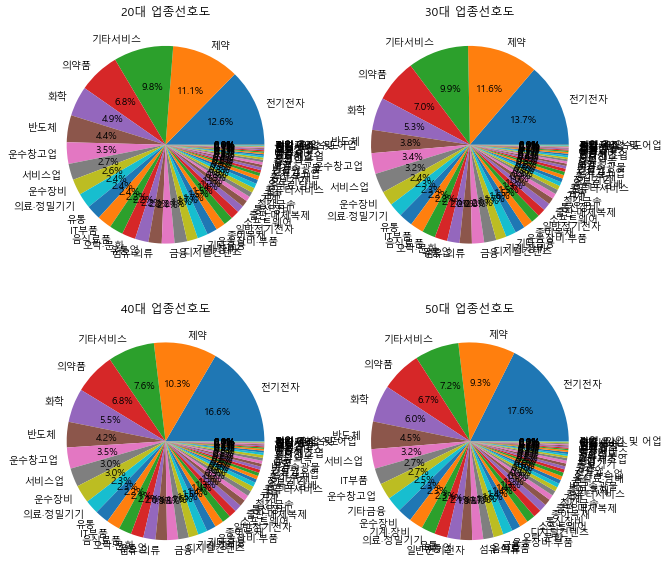

In [96]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.pie(han_merge['업종명'][han_merge['동일나이군구분코드']==20].value_counts(), labels=han_merge['업종명'].value_counts().index, autopct='%1.1f%%')
ax2.pie(han_merge['업종명'][han_merge['동일나이군구분코드']==30].value_counts(), labels=han_merge['업종명'].value_counts().index, autopct='%1.1f%%')
ax3.pie(han_merge['업종명'][han_merge['동일나이군구분코드']==40].value_counts(), labels=han_merge['업종명'].value_counts().index, autopct='%1.1f%%')
ax4.pie(han_merge['업종명'][han_merge['동일나이군구분코드']==50].value_counts(), labels=han_merge['업종명'][han_merge['동일나이군구분코드']==50].value_counts().index, autopct='%1.1f%%')

ax1.set_title('20대 업종선호도')
ax2.set_title('30대 업종선호도')
ax3.set_title('40대 업종선호도')
ax4.set_title('50대 업종선호도')

plt.show()

In [100]:
han_merge_20 = han_merge[['상품명', '업종명', '총체결금액']][han_merge['동일나이군구분코드']==20]
han_invest_20 = han_merge_20.groupby(['상품명', '업종명'])['총체결금액'].sum().reset_index().sort_values(by='총체결금액', ascending=False)
han_invest_20 = han_invest_20.head(20)
han_invest_20

,상품명,업종명,총체결금액
608,삼성전자보통주,전기전자,7416487550
826,씨젠,제약,6871568200
1246,이원다이애그노믹스,기타서비스,2957529660
785,신풍제약보통주,의약품,2752632590
1771,한진칼보통주,운수창고업,2616874800
607,삼성전자1우선주,전기전자,2561675750
415,랩지노믹스,기타서비스,2427095140
1400,진원생명과학보통주,의약품,2079507830
742,수젠텍,의료·정밀기기,2026787890
1820,현대자동차보통주,운수장비,1570901800


In [101]:
han_merge_30 = han_merge[['상품명', '업종명', '총체결금액']][han_merge['동일나이군구분코드']==30]
han_invest_30 = han_merge_30.groupby(['상품명', '업종명'])['총체결금액'].sum().reset_index().sort_values(by='총체결금액', ascending=False)
han_invest_30 = han_invest_30.head(20)
han_invest_30

,상품명,업종명,총체결금액
854,씨젠,제약,25402696450
631,삼성전자보통주,전기전자,24057325800
1288,이원다이애그노믹스,기타서비스,10951941150
1835,한진칼보통주,운수창고업,8223786900
434,랩지노믹스,기타서비스,7323873390
813,신풍제약보통주,의약품,6088330960
769,수젠텍,의료·정밀기기,5803396700
630,삼성전자1우선주,전기전자,5653369800
1193,웰크론,섬유·의류,5254749080
988,에스케이하이닉스보통주,전기전자,4906631500


In [102]:
han_merge_40 = han_merge[['상품명', '업종명', '총체결금액']][han_merge['동일나이군구분코드']==40]
han_invest_40 = han_merge_40.groupby(['상품명', '업종명'])['총체결금액'].sum().reset_index().sort_values(by='총체결금액', ascending=False)
han_invest_40 = han_invest_40.head(20)
han_invest_40

,상품명,업종명,총체결금액
614,삼성전자보통주,전기전자,24525061400
830,씨젠,제약,18660601150
613,삼성전자1우선주,전기전자,5734881050
1248,이원다이애그노믹스,기타서비스,5570767770
1775,한진칼보통주,운수창고업,5279954350
791,신풍제약보통주,의약품,5228782540
423,랩지노믹스,기타서비스,5035527210
748,수젠텍,의료·정밀기기,4912914390
958,에스케이하이닉스보통주,전기전자,4735875700
730,셀트리온보통주,의약품,4625945000


In [103]:
han_merge_50 = han_merge[['상품명', '업종명', '총체결금액']][han_merge['동일나이군구분코드']==50]
han_invest_50 = han_merge_50.groupby(['상품명', '업종명'])['총체결금액'].sum().reset_index().sort_values(by='총체결금액', ascending=False)
han_invest_50 = han_invest_50.head(20)
han_invest_50

,상품명,업종명,총체결금액
575,삼성전자보통주,전기전자,16330592900
772,씨젠,제약,7847003650
574,삼성전자1우선주,전기전자,5049196050
884,에스케이하이닉스보통주,전기전자,3279885600
681,셀트리온헬스케어,유통,3151371600
1636,한진칼보통주,운수창고업,2796836100
491,미코,반도체,2764487390
734,신풍제약보통주,의약품,2680729190
565,삼성SDI보통주,전기전자,2600079500
679,셀트리온보통주,의약품,2297141500


---

<span style="font-weight: bold; font-size: 20px; color:blue">기성 세대(40대, 50대) 의 투자 비중은 전기전자 업종이 가장 높고, 그 다음 제약, 기타 서비스 순이었다. MZ 세대(20대, 30대) 역시 전기전자 업종의 투자 비중이 가장 높았으나, 그 비중은 다른 세대에 비해 적은 대신 제약, 기타 서비스 업종에 좀 더 투자 비중이 높았다.</span>
<span style="font-weight: bold; font-size: 20px; color:blue">데이터 조사 시기는 코로나19의 유행으로 제약 종목과 진단서비스(기타서비스) 업종에 투자금이 몰리는 시기였기 때문에, MZ 세대가 다른 세대에 비해 테마(trend)에 따라 투자하는 성향이 있다는 것을 확인할 수 있었다.</span>

---

### 2. 나이군별로 선호하는 시장(kospi, kosdaq) 과 투자 종목의 시가총액을 비교, 분석해본다.

Text(0.5, 1.0, '나이군별 총체결금액')

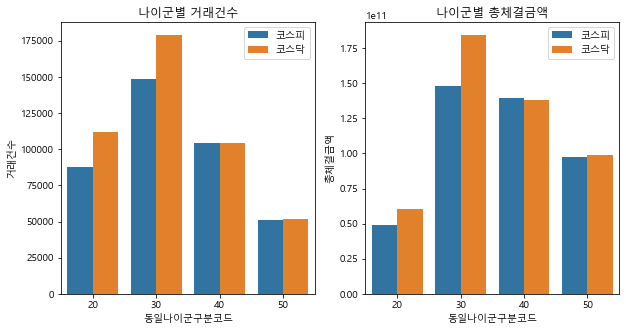

In [203]:
han_cos_cnt = han_merge.groupby('동일나이군구분코드')['거래소구분코드'].value_counts()
han_cos_cnt = pd.DataFrame(han_cos_cnt)
han_cos_cnt.columns = ['거래건수']
han_cos_cnt = han_cos_cnt.reset_index()
han_cos_cnt['거래소구분'] = han_cos_cnt['거래소구분코드'].map(lambda x:'코스피' if x==2 else '코스닥')

han_cos_total = han_merge.groupby(['동일나이군구분코드', '거래소구분코드'])['총체결금액'].sum()
han_cos_total = pd.DataFrame(han_cos_total)
han_cos_total = han_cos_total.reset_index()
han_cos_total['거래소구분'] = han_cos_total['거래소구분코드'].map(lambda x:'코스피' if x==2 else '코스닥')

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

g = sns.barplot(x='동일나이군구분코드', y='거래건수', hue='거래소구분코드', data=han_cos_cnt, ax=ax1)
sns.barplot(x='동일나이군구분코드', y='총체결금액', hue='거래소구분코드', data=han_cos_total, ax=ax2)

ax1_legend=ax1.legend()
ax1_legend.get_texts()[0].set_text('코스피')
ax1_legend.get_texts()[1].set_text('코스닥')

ax2_legend=ax2.legend()
ax2_legend.get_texts()[0].set_text('코스피')
ax2_legend.get_texts()[1].set_text('코스닥')

ax1.set_title('나이군별 거래건수')
ax2.set_title('나이군별 총체결금액')

<AxesSubplot:xlabel='동일나이군구분코드', ylabel='시가총액평균'>

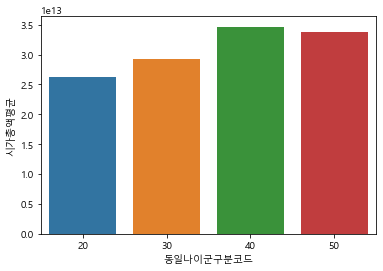

In [141]:
han_total = han_merge.groupby('동일나이군구분코드')['시가총액'].mean()
han_total = pd.DataFrame(han_total)
han_total.columns = ['시가총액평균']
han_total = han_total.reset_index()
sns.barplot(x='동일나이군구분코드', y='시가총액평균', data=han_total)

---

<span style="font-weight: bold; font-size: 20px; color:blue">MZ 세대는 코스피 종목보다 코스닥 종목에 더 많이 거래하고 투자한 반면, 기성 세대는 코스피와 코스닥 종목의 투자 비중이 거의 비슷했다. 또한, MZ 세대는 시가총액이 작은 종목에 더 많이 투자한 반면, 기성 세대는 시가총액이 큰 종목에 더 많이 투자하였다.</span>

<span style="font-weight: bold; font-size: 20px; color:blue">일반적으로, 코스피 종목보다 코스닥 종목이, 시가총액이 큰 종목보다 작은 종목이 리스크는 크지만 투자보상은 크다는 것을 고려하면, MZ 세대는 기성 세대보다 공격적인 투자로 적극적으로 수익을 창출하고자 한다는 것을 알 수 있다.</span>

---

# ◆ 결론 및 활용

<span style="font-weight: bold; font-size: 20px; color:blue">1. 동학개미운동기간 동안 MZ 세대가 기성 세대보다 거래건수가 많았다. 특히, 30대는 거래건수, 총체결금액에서 다른 나이군보다 월등히 많았다. 따라서 동학개미운동의 주역은 MZ 세대인 것을 알 수 있었다.</span>

<span style="font-weight: bold; font-size: 20px; color:red">-> 주식 투자에 관심이 많은 MZ 세대에게 어필하기 위해 주식 투자 관련 정보 및 상품 등을 제공하면, MZ 세대를 고객으로 유치하는데 도움이 될 것이다.</span>
### 예: 기존 금융권이 자사의 입출금 계좌에 등록된 MZ 세대에게 주식 투자가 가능한 CMA 계좌 등을 추천하거나, 계좌 잔고 이자의 일부를 주식 수수로 감면, 리워드 (예: 카카오페이 R 리워드) 등을 제공하여 신규 고객 유치 또는 기존 고객 수성. 

---

<span style="font-weight: bold; font-size: 20px; color:blue">2. MZ 세대는 주식 투자 성향에 있어 기존 세대 보다 테마(trend) 를 따르는 경향이 강하며, 안정적인 투자 보다는 위험하지만 수익률이 높은 투자를 선호한다.</span>
    
<span style="font-weight: bold; font-size: 20px; color:red">-> MZ 세대에게 익숙한 모바일, SNS 등을 통해 최근 주식 테마(trend) 정보를 전달한다. 개인 맞춤형 투자 분석을 통해, MZ 세대 각 개인이 선호하는 테마와 관련된 뉴스를 제공한다.</span>
### 예: 주식 계좌 개설 시 최근 테마 종목 1 주를 주는 이벤트 기획하거나, 계좌 개설 시 선호하는 업종을 선택하면 관련 정보를 제공하는 등을 통해 신규 고객 유치 또는 기존 고객 수성. 